# Metropolis-Hasting Sampling of Poisson Distribution

## Poisson Distribution

$$
p(k|\mu) = \frac{\mu^k e^{-\mu}}{k!} \quad \mbox{for }k\geq 0 \;.
$$

where $k$ is an integer and $\mu$ is called the shape parameter. The mean and variance of this distribution are both equal to $\mu$.

## Meaning of Samplig Posisson Distribution

`sampling a Poisson distribution` we mean we will obtain a set of  𝑘  values:  $k$ values: $\{k_1, k_2, k_3, \ldots\}$  that follow this distribution

## The Algorithm

1. Choose an initial $k$ (call it $k0$), having already fixed mean ($\mu$)
2. Given $k_i$, sample a uniform random number $x$ from 0 to 1 (so $x \sim U(0,1)$) and propose $k' = k_i + 1$ if the $x > 0.5$, otherwise propose $k' = k_i - 1$
3. Compute the Metropolis ratio $r = min(1,p(k'|\mu)\, /\, p(k_i|\mu))$ using the discrete Poisson distribution.
4. Given another uniform random number $y \sim U(0,1)$, $k_{i+1} = k'$ if $y \leq r$, else $k_{i+1} = k_i$ (i.e., keep the same value for the next $k$).
5. Repeat 2.-4. until you think you have enough samples of $k$.


## Notes on Implementation

1. We need two sets of $n$ numbers of random numbers between 0 and 1 from uniform distribution, we can generate them at once outside of the loop
2. Since we cannot compute factorial for negative number we will not let kp be less than 0

## Implementation

### Import the Necessary Libaries

In [1]:
import numpy as np
from math import factorial,ceil
import scipy.stats as stats  
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn')

### Define Poission Distribution Function

In [2]:
def poisson_function(k, mean):
    """
    Returns a Poisson distribution value for k with mean
    """
    return mu**k * np.exp(-mean) / factorial(k)  

### Intalize the Value of mean($\mu$)  and $K_0$

In [3]:
mu=3.2
k0=10

### Define Number of Steps

In [4]:
n_steps = 10000

### Generate Uniform Random Variable to be used later 

In [5]:
uniform_1 = stats.uniform.rvs(size=n_steps)  
uniform_2 = stats.uniform.rvs(size=n_steps)

### Intalize an empty array to store simulated result

In [6]:
k_array = np.zeros(n_steps, dtype=int)
k_array[0] = k0
accept_rate_array = []
accept_rate_count = 0

In [7]:
for i in range(0,n_steps-1):
    k_now = k_array[i]
    if uniform_1[i] > 0.5:
        kp = k_now + 1          
    else:
        # Since we cannot compute factorial for negative number we will not let kp be less than 0
        kp = max(0, k_now - 1) 
    metropolis_r = min(1,poisson_function(kp, mu) / poisson_function(k_now, mu))
    
    if uniform_2[i] <= metropolis_r:
        k_array[i+1] = kp
        accept_rate_count+=1
        accept_rate_array.append(accept_rate_count/(i+1))
    else:
        k_array[i+1] = k_now
        accept_rate_array.append(accept_rate_count/(i+1))

### Burn In Steps 

In [8]:
burn_in_steps = ceil(0.10*n_steps)

In [9]:

# Check the mean and standard deviations from the samples against exact
print(f' MCMC mean = {np.mean(k_array[burn_in_steps:]):.2f}')
print(f'Exact mean = {stats.poisson.mean(mu=mu):.2f}')
print(f'   MCMC sd = {np.std(k_array[burn_in_steps:]):.2f}')
print(f'  Exact sd = {stats.poisson.std(mu=mu):.2f}')      

 MCMC mean = 3.38
Exact mean = 3.20
   MCMC sd = 1.93
  Exact sd = 1.79


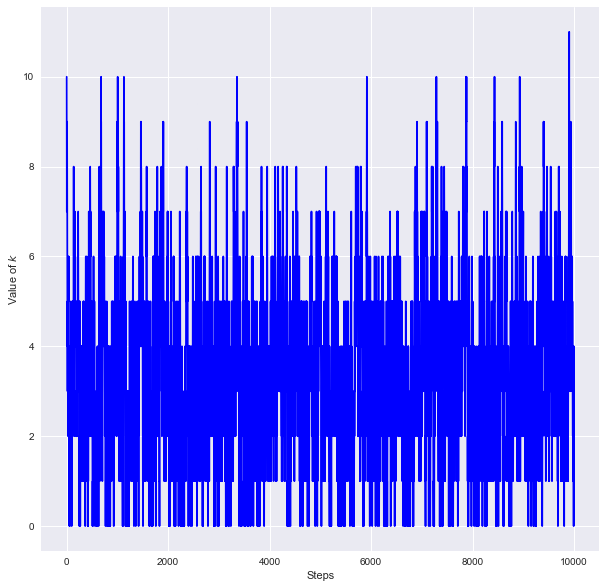

In [10]:
plt.figure(figsize=(10,10))
plt.plot(range(n_steps), k_array, color='blue')
plt.xlabel('Steps')
plt.ylabel('Value of $k$')
plt.show()

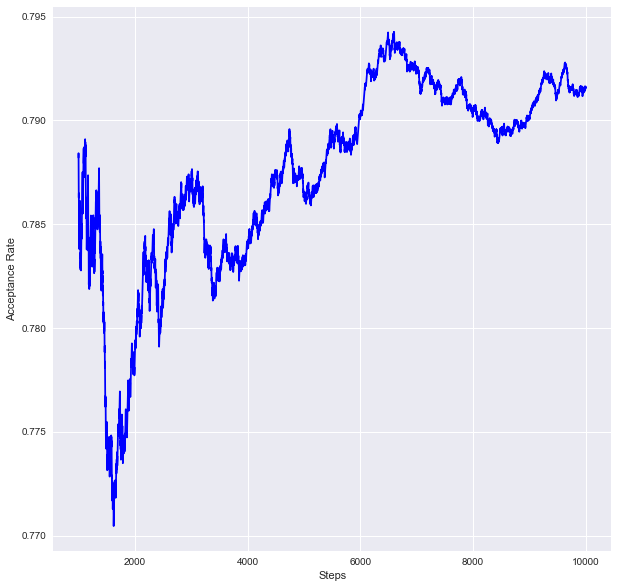

In [11]:
plt.figure(figsize=(10,10))
plt.plot(range(burn_in_steps,n_steps-1), accept_rate_array[burn_in_steps:], color='blue')
plt.xlabel('Steps')
plt.ylabel('Acceptance Rate')
plt.show()

## Refrences:
1. [Physics-8820  University of York in 2019](https://furnstahl.github.io/Physics-8820/about.html)
2. [Probabilistic Modelling and Reasoning](https://www.inf.ed.ac.uk/teaching/courses/pmr/18-19/assets/assignment-part-2.pdf)